### Table of Content
- Introduction:
- What is Isolation Forest?
- Isolation Forests Anamoly Detection
- How do Isolation Forests work?
    - Implementation in Python:
        - Initial and exploratory data analysis
        - Define and fit the model
    - Limitations of Isolation Forest:
- Conclusion
- Frequently Asked Questions

### Introduction
- Any data point/observation that deviates significantly from the other observations is called an Anomaly/Outlier.
- Anomaly detection is important and finds its application in various domains like 
    - detection of fraudulent bank transactions, 
    - network intrusion detection, 
    - sudden rise/drop in sales, 
    - change in customer behavior

### what is Isolation forest - an unsupervised anomaly detection technique

- The approach employs binary trees to detect anomalies, 
- resulting in a linear time complexity and 
- low memory usage that is well-suited for processing large datasets.
- Isolation Forest has gained popularity as a fast and reliable algorithm for anomaly detection in various fields such as cybersecurity, finance, and medical research.
- IsolationForests were built based on the fact that anomalies are the data points that are “few and different”


### How does Isolation Forest work
- In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. 
- The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. 
- Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.
- Isolation Forests outlier detection are nothing but an ensemble of binary decision trees. And each tree in an Isolation Forest is called an Isolation Tree(iTree). 
- The algorithm starts with the training of the data, by generating Isolation Trees

### Algorithm
- When given a dataset, a random sub-sample of the data is selected and assigned to a binary tree.
- Branching of the tree starts by selecting a random feature (from the set of all N features) first. And then branching is done on a random threshold ( any value in the range of minimum and maximum values of the selected feature).
- If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
- This process from step 2 is continued recursively till each data point is completely isolated or till max depth(if defined) is reached.
- The above steps are repeated to construct random binary trees.

### Implementation in Python

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### Initial Data Analysis

In [2]:
data = pd.read_csv('marks.csv')

In [3]:
data.head()

,student id,marks
0,1,95
1,2,98
2,3,92
3,4,10000
4,5,91


In [4]:
print(data.head(10))

   student id  marks
0           1     95
1           2     98
2           3     92
3           4  10000
4           5     91
5           6     89
6           7     90
7           8   2000
8           9    100
9          10    100


In [12]:
data.marks

0       95
1       98
2       92
3    10000
4       91
5       89
6       90
7     2000
8      100
9      100
Name: marks, dtype: int64

In [13]:
data['marks']

0       95
1       98
2       92
3    10000
4       91
5       89
6       90
7     2000
8      100
9      100
Name: marks, dtype: int64

In [14]:
data[['marks']]

,marks
0,95
1,98
2,92
3,10000
4,91
5,89
6,90
7,2000
8,100
9,100


### Exploratory Data Analysis

<AxesSubplot:xlabel='marks'>

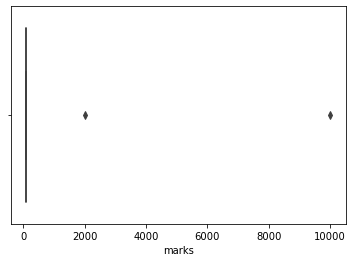

In [8]:
sns.boxplot(data.marks)

- There seems to be two anomalies

### Define and Fit the model

In [15]:
random_state = np.random.RandomState(42)

In [16]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state = random_state)

#### Model details

In [19]:
model

IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)

In [18]:
model.base_estimator

ExtraTreeRegressor(max_features=1,
                   random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)

In [20]:
model.contamination

0.2

In [21]:
model.max_samples

'auto'

In [22]:
model.n_estimators

100

In [23]:
model.random_state

RandomState(MT19937) at 0x7FBD1BAFAD40

In [24]:
model.get_params

<bound method BaseEstimator.get_params of IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)>

In [25]:
model.get_params()

{'bootstrap': False,
 'contamination': 0.2,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': RandomState(MT19937) at 0x7FBD1BAFAD40,
 'verbose': 0,
 'warm_start': False}

In [28]:
model.decision_function

<bound method IsolationForest.decision_function of IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)>

In [ ]:
model.

In [29]:
model.fit

<bound method IsolationForest.fit of IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)>

In [30]:
model.fit()

TypeError: fit() missing 1 required positional argument: 'X'

In [32]:
print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FBD1BAFAD40, 'verbose': 0, 'warm_start': False}


#### Model fitting

In [31]:
model.fit(data[['marks']])

IsolationForest(contamination=0.2,
                random_state=RandomState(MT19937) at 0x7FBD1BAFAD40)

### Score the data to obtain anomaly scores

In [36]:
data['scores'] = model.decision_function(data[['marks']])

In [37]:
data.head()

,student id,marks,scores
0,1,95,0.066074
1,2,98,0.052864
2,3,92,0.098415
3,4,10000,-0.318638
4,5,91,0.106519


In [38]:
data['anomaly_score'] = model.predict(data[['marks']])

In [40]:
data.head(10)

,student id,marks,scores,anomaly_score
0,1,95,0.066074,1
1,2,98,0.052864,1
2,3,92,0.098415,1
3,4,10000,-0.318638,-1
4,5,91,0.106519,1
5,6,89,0.054518,1
6,7,90,0.098212,1
7,8,2000,-0.211458,-1
8,9,100,0.069109,1
9,10,100,0.069109,1


In [41]:
data[data['anomaly_score'] == -1]

,student id,marks,scores,anomaly_score
3,4,10000,-0.318638,-1
7,8,2000,-0.211458,-1


### Model Evalucation

In [47]:
anomaly_count = 2

In [49]:
accuracy = 100 * list(data['anomaly_score']).count(-1) / (anomaly_count)
accuracy

100.0

In [43]:
100 * list(data['anomaly_score']).count(-1)

200

In [44]:
list(data['anomaly_score'])

[1, 1, 1, -1, 1, 1, 1, -1, 1, 1]

In [45]:
list(data['anomaly_score']).count(-1)

2

### Try
- what happens if we change the contamination pramater

[Anomaly Detection using isolation Forest](https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/)